<h1>Cegpy</h1>
A Python package built to simplify the creation of Chain Event Graphs (CEGs) from datasets.

<h2>Basic Chain Event Graph Example</h2>

This first example builds a Chain Event Graph (CEG) from a discrete dataset showing results from a medical experiment.
The dataset used is symetrical, built from a rectangular dataset. These CEGs are known as <em>stratified</em> in the literature.

The Agglomerative Hierarchical Clustering (AHC) algorithm used to determine the dataset's stages.

<h3>Step 1: Import the dataset</h3>

The example 'medical.xlsx' dataset contains 4 catagorical variables; Classification, Group, Difficulty, Response.

Each individual is given a classification; 'Blast' or 'Non-blast'. Each group is rated on their experience level; 'Experienced', 'Inexperienced', or 'Novice'.
The classification task they are given has a difficulty rating of 'Easy' or 'Hard'. Finally, their response is shown; 'Blast' or 'Non-blast'.

In [6]:
from cegpy import StagedTree, ChainEventGraph
import pandas as pd

dataframe = pd.read_excel("medical.xlsx")
dataframe

,Classification,Group,Difficulty,Response
0,Blast,Experienced,Easy,Blast
1,Non-blast,Experienced,Easy,Non-blast
2,Non-blast,Experienced,Hard,Blast
3,Non-blast,Experienced,Hard,Non-blast
4,Blast,Experienced,Easy,Blast
...,...,...,...,...
10979,Blast,Novice,Easy,Non-blast
10980,Blast,Novice,Easy,Blast
10981,Non-blast,Novice,Easy,Blast
10982,Blast,Novice,Easy,Non-blast


In [7]:
# Descriptive statistics for the dataset 
dataframe.describe()

,Classification,Group,Difficulty,Response
count,10984,10984,10984,10984
unique,2,3,2,2
top,Non-blast,Novice,Easy,Blast
freq,5493,7389,5494,5863


<h3>Step 2: Transform dataset into a tree, and apply the AHC algorithm</h3>

AHC is executed on the tree, and the nodes are assigned a colour if they are found to be in the same 'stage' as each other.
Effectively, we can consider that these nodes share the same parameter set; in other words, the immediate future of the nodes is identical.
When the chain event graph is created, equivalent nodes (precisely, those whose complete future is identical) in a stage will be combined to compress the graph.

In [8]:
staged_tree = StagedTree(dataframe)
_ = staged_tree.calculate_AHC_transitions()

/home/vscode/.local/lib/python3.9/site-packages/cegpy/trees/_staged.py:421: RuntimeWarning: invalid value encountered in double_scalars
  self._calculate_lg_of_sum(new_prior)


<h3>Step 3: Creation of the Chain Event Graph</h3>

By passing the staged tree into the `ChainEventGraph` class, we create the CEG. It can be displayed using the `.create_figure()` method.

_Note: Nodes in the same stage are compared to determine if it is possible to join them together or not. Some are simply not logically compatible with each other. For details, see the documentation._


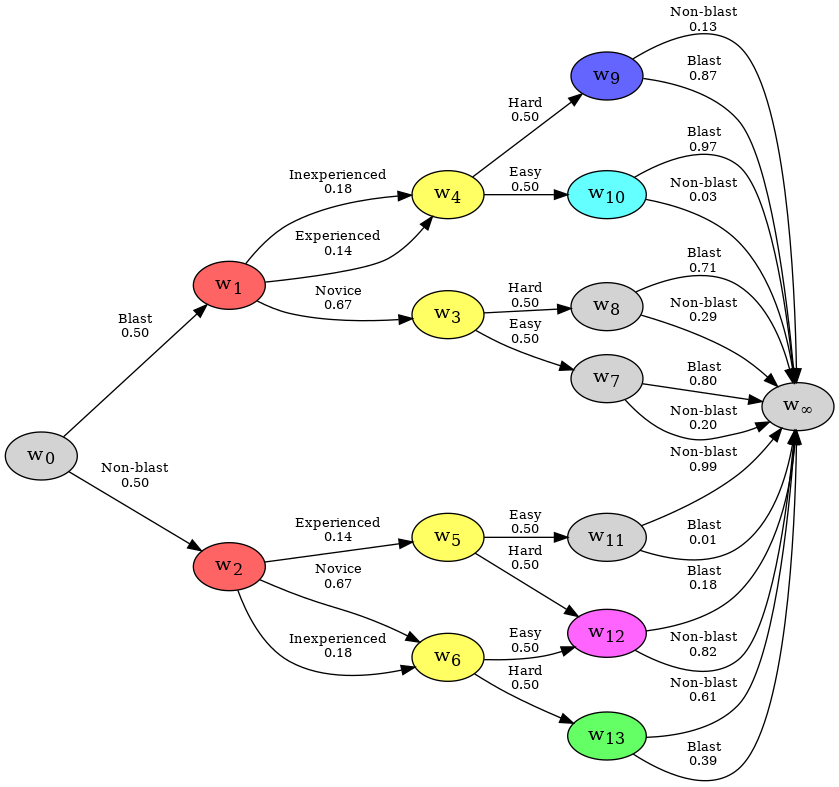

In [9]:
chain_event_graph = ChainEventGraph(staged_tree)
chain_event_graph.create_figure()

<h2>Breakdown of the intermediate steps</h2>

A `StagedTree` is a coloured `EventTree`. 

The `EventTree` class is responsible for the conversion of the dataset into a tree.

If you are having problems with importing datasets, it is wise to debug the generation of the `EventTree`.  

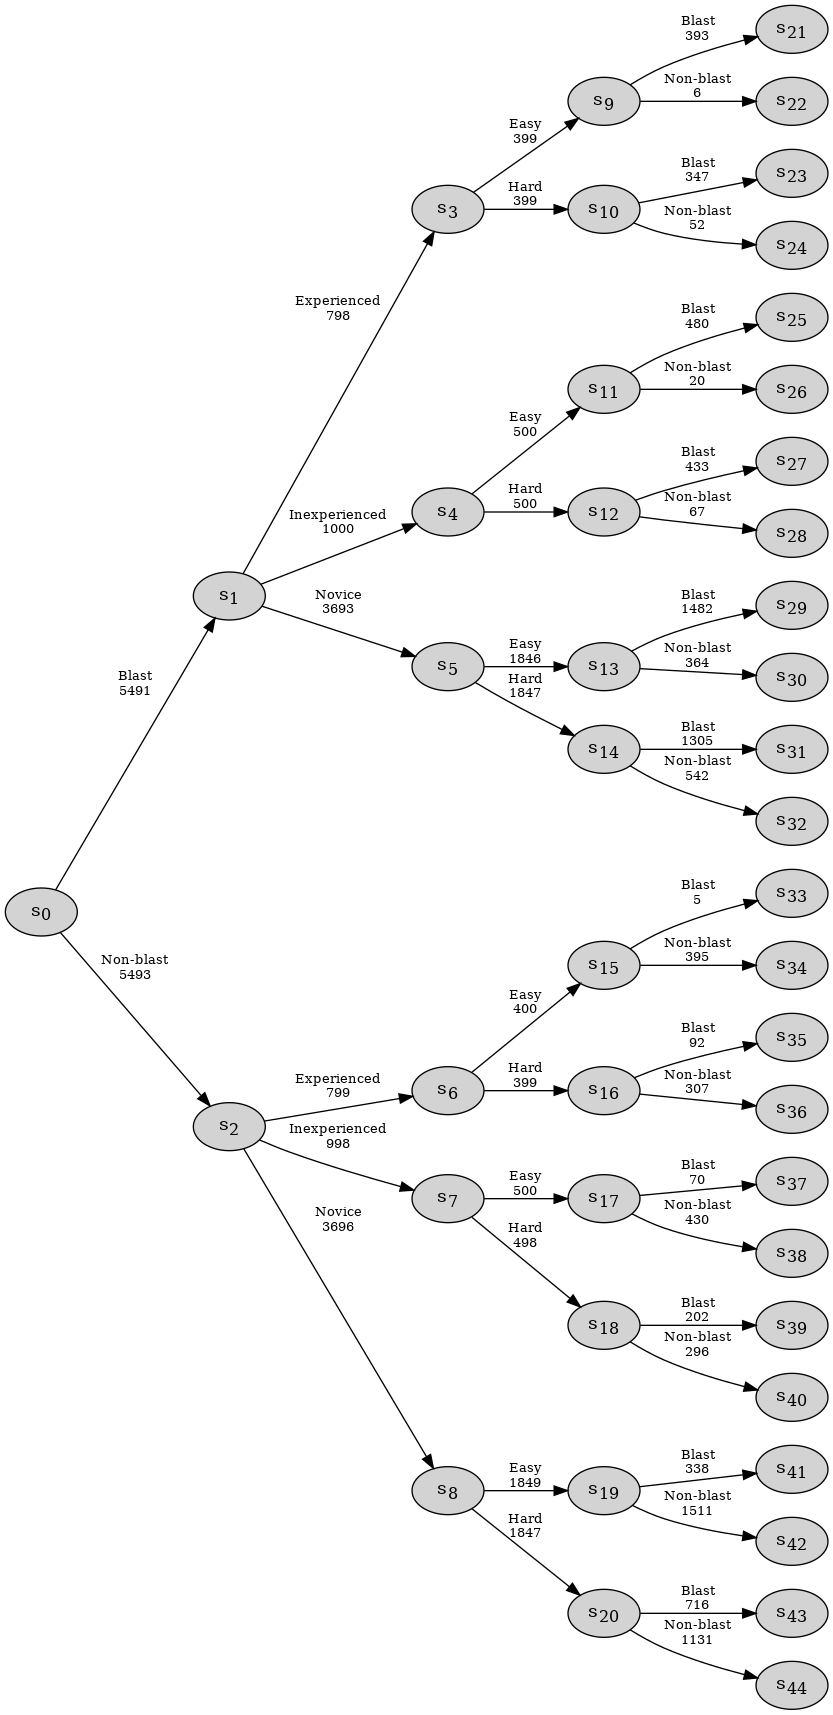

In [10]:
from cegpy import EventTree

med_event_tree = EventTree(dataframe)
med_event_tree.create_figure()

<h3>Displaying the `StagedTree`</h3>

The `StagedTree` figure can be displayed after determining the stages; i.e. after running the `.calculate_AHC_transitions()` method, which executes the AHC algorithm.

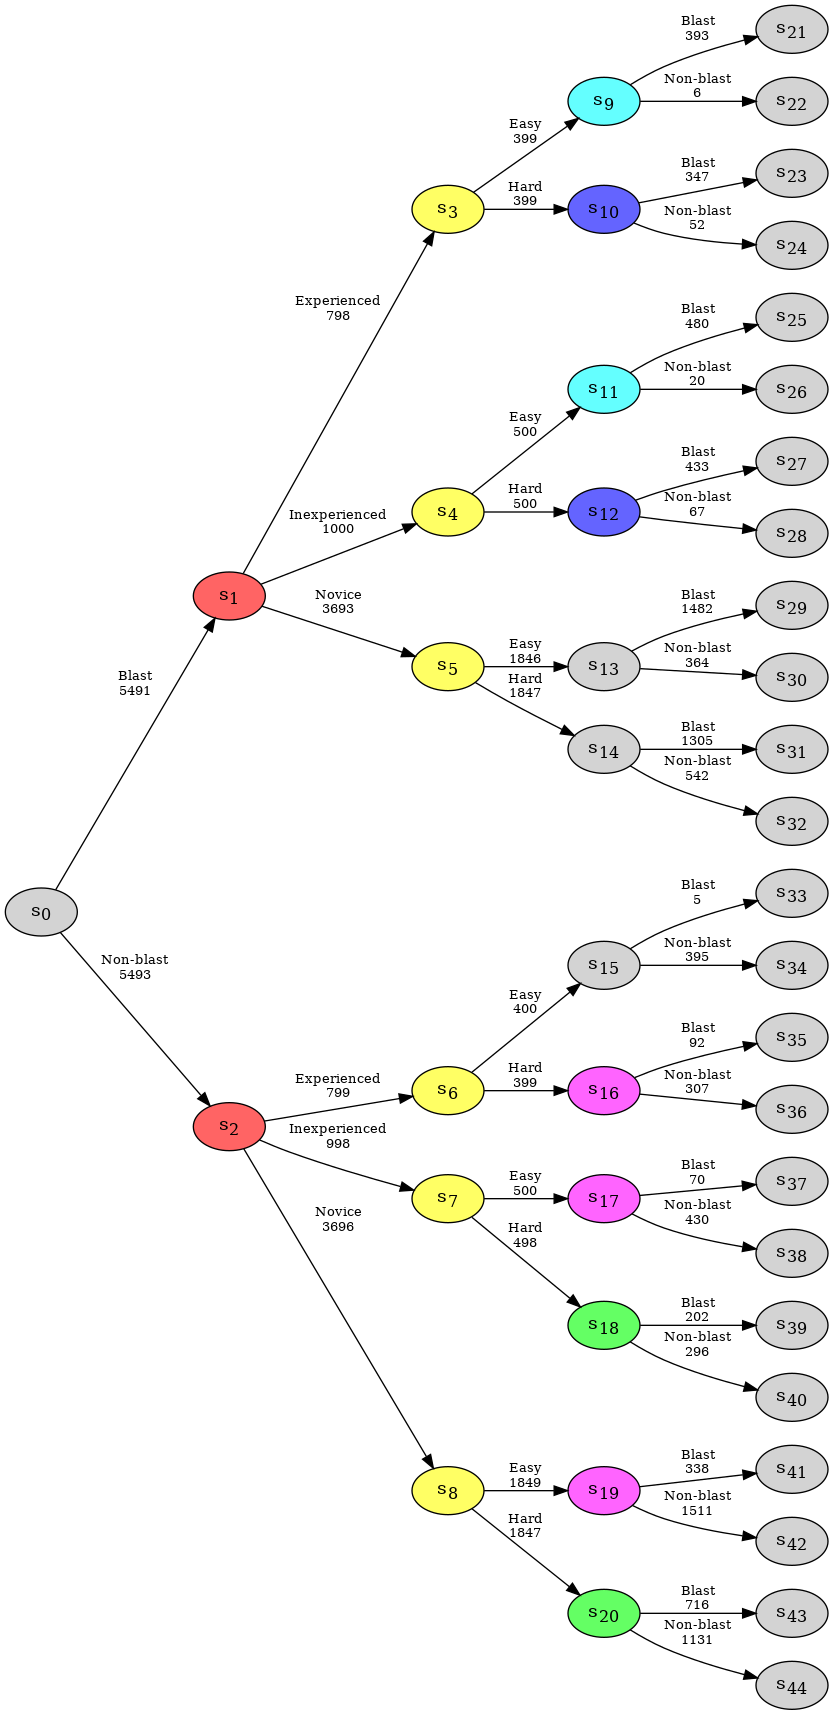

In [11]:
staged_tree = StagedTree(dataframe)
staged_tree.calculate_AHC_transitions()
staged_tree.create_figure()

<h3>Further reading</h3>

For more examples, check out the other binders in this repository. For more information, see the documentation.